# Analisis Alasan Resign

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/mchosasih99/dataset/main/employee_retention_clean.csv')

In [ ]:
#Total Resign tiap Pekerjaan

total_resign = df.groupby(['Pekerjaan', 'Resign','Departemen']).agg({'Pekerjaan':'count'}).sort_values('Resign')
total_resign.columns = (['Jumlah'])
total_resign.reset_index(inplace=True)

resign_yes = total_resign[total_resign['Resign']==1]
resign_no = total_resign[total_resign['Resign']==0]

resign_pekerjaan = resign_yes.merge(resign_no,
                                    on = ['Pekerjaan'],
                                    how = 'outer')
resign_pekerjaan

,Pekerjaan,Resign_x,Departemen_x,Jumlah_x,Resign_y,Departemen_y,Jumlah_y
0,Product Design (UI & UX),1.0,Product,9.0,0,Product,15
1,Software Engineer (Front End),1.0,Software,28.0,0,Software,44
2,Product Manager,1.0,Product,6.0,0,Product,11
3,Data Engineer,1.0,Data,3.0,0,Data,7
4,Software Engineer (Android),1.0,Software,7.0,0,Software,17
5,Software Engineer (Back End),1.0,Software,28.0,0,Software,81
6,Data Analyst,1.0,Data,8.0,0,Data,8
7,Software Architect,NaN,NaN,NaN,0,Software,1
8,Scrum Master,NaN,NaN,NaN,0,Scrum Master,3
9,Product Design (UX Researcher),NaN,NaN,NaN,0,Product,1


In [ ]:
# Membersihkan table agregasi

resign_pekerjaan.drop(['Resign_x','Resign_y','Departemen_x'],1,inplace=True)
resign_pekerjaan.rename(columns={'Jumlah_x':'Resign',
                                 'Jumlah_y':'TidakResign',
                                 'Departemen_y':'Departemen'}, inplace=True)
resign_pekerjaan.fillna(0, inplace=True)

resign_pekerjaan.Resign = resign_pekerjaan.Resign.astype(int)
resign_pekerjaan = resign_pekerjaan[['Pekerjaan', 'Departemen',
                                     'TidakResign','Resign']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Mengekstrak kolom dari tabel agregasi

resign_pekerjaan['JumlahKaryawan'] = resign_pekerjaan['Resign'] + resign_pekerjaan['TidakResign']
resign_pekerjaan['RetentionRate'] = (resign_pekerjaan['TidakResign'] / resign_pekerjaan['JumlahKaryawan'] * 100).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Menambah kolom rata-rata retensi tiap Departemen

departemen_avg = resign_pekerjaan.groupby('Departemen').agg({'RetentionRate':'mean'}).reset_index()
departemen_avg.rename(columns=({'RetentionRate':'AvgRetentionRateDep'}),inplace=True)
departemen_avg['AvgRetentionRateDep'] = departemen_avg['AvgRetentionRateDep'].round(2)
departemen_avg['AvgRetentionRateDep'] = departemen_avg['AvgRetentionRateDep'].astype(str) + ('%')
resign_pekerjaan = resign_pekerjaan.merge(departemen_avg,
                             on='Departemen')

resign_pekerjaan

,Pekerjaan,Departemen,TidakResign,Resign,JumlahKaryawan,RetentionRate,AvgRetentionRateDep
0,Product Design (UI & UX),Product,15,9,24,62.50,81.8%
1,Product Manager,Product,11,6,17,64.71,81.8%
2,Product Design (UX Researcher),Product,1,0,1,100.00,81.8%
3,Digital Product Manager,Product,2,0,2,100.00,81.8%
4,Software Engineer (Front End),Software,44,28,72,61.11,84.38%
5,Software Engineer (Android),Software,17,7,24,70.83,84.38%
6,Software Engineer (Back End),Software,81,28,109,74.31,84.38%
7,Software Architect,Software,1,0,1,100.00,84.38%
8,DevOps Engineer,Software,3,0,3,100.00,84.38%
9,Software Engineer (iOS),Software,3,0,3,100.00,84.38%


## Retention per Departemen

In [ ]:
import plotly.express as px

In [ ]:
retention_color_map = {'Data': '#FFE156', 
                      'Software': '#FFBE86',
                      'Product': '#FFE9CE',
                      'Scrum Master': '#FFB5C2'}

fig = px.sunburst(resign_pekerjaan, path=['Departemen','Pekerjaan'],
				values='RetentionRate', color = 'Departemen',
        color_discrete_map=retention_color_map, width=600, height=600,
        hover_data=["AvgRetentionRateDep"]
        )
fig.update_layout(
    title={
        'text': "Retention Rate per Departemen",
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Epilogue",
        size=18,
        color="Black"))
fig.show()


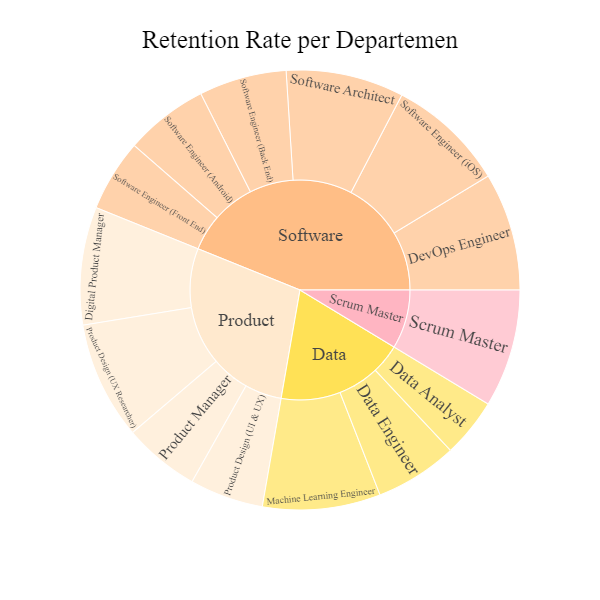

Departemen Data merupakan departemen yang memiliki tingkat retensi rata-rata paling rendah, yaitu sebesar 73.33%. Pekerjaan dalam Departemen Data yang paling rendah tingkat retensinya adalah **`Data Analyst`**, yaitu sebesar 50%. Kemudian dua jenis Pekerjaan dengan tingkat retensi terendah lainnya adalah **`Software Engineer (Front End`**) dan **`Product Design (UI & UX)`**, masing-masing tingkat retensinya adalah 61.11% dan 62.5%.

## Analisi Resign Pekerjaan Retensi Terendah

In [ ]:
#Membuat tabel agregasi faktor resign
faktor_resign = df.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign', 'Pekerjaan']).agg({'Resign':'count'}).reset_index()

#Memisahkan ketiga pekerjaan retensi terendah
data_analyst_resign = faktor_resign[(faktor_resign['Pekerjaan']=='Data Analyst') & (~faktor_resign['AlasanResign'].isin(['masih_bekerja','Tidak_Resign']))]
front_end_resign = faktor_resign[(faktor_resign['Pekerjaan']=='Software Engineer (Front End)') & (~faktor_resign['AlasanResign'].isin(['masih_bekerja','Tidak_Resign']))]
productdesign_resign = faktor_resign[(faktor_resign['Pekerjaan']=='Product Design (UI & UX)') & (~faktor_resign['AlasanResign'].isin(['masih_bekerja','Tidak_Resign']))]

In [ ]:
# Data Analyst
dataanalyst_color_map = {'toxic_culture': '#FFE156', 
                      'internal_conflict': '#FFE9CE'}

fig = px.sunburst(data_analyst_resign, path=['AlasanResign','JenjangKarir' ,'PerformancePegawai'],
				values='Resign', title='Resign Rate Karyawan', color = 'AlasanResign',
        color_discrete_map=dataanalyst_color_map, width=600, height=600
        )

fig.update_layout(
    title={
        'text': "Faktor Resign Data Analyst",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Epilogue",
        size=16,
        color="Black"))
fig.show()


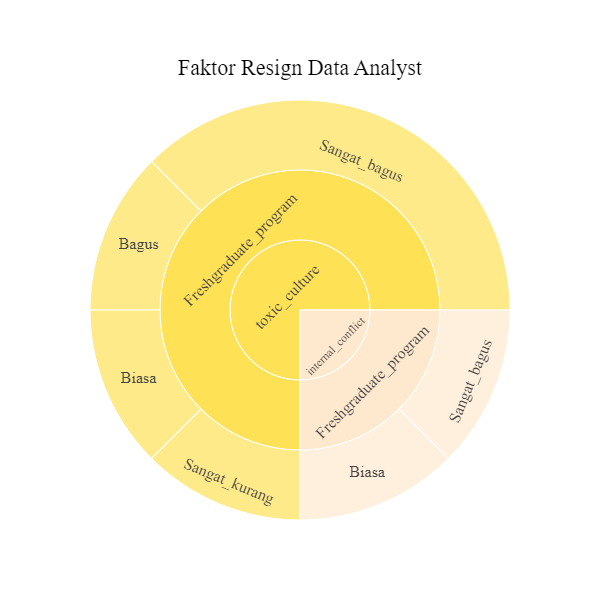

Seluruh karyawan yang keluar merupakan Fresh Graduate Program. 6 Dari 8 karyawan yang keluar beralasan karena toxic culture. Sedangkan dua lainnya berpendapat adanya internal conflict, yang mana merupakan akibat dari budaya kerja yang buruk. Dalam kasus Data Analyst, performa karyawan tidak terlalu berpengaruh pada alasan resign.

In [ ]:
# Software Engineer (Front End)
frontend_color_map = {'tidak_bisa_remote': '#FFE156', 
                      'jam_kerja': '#FFD06E',
                      'kejelasan_karir':'#FFBE86',
                      'leadership':'#FFD4AA',
                      'toxic_culture': '#FFDFBC',
                      'Tidak_cocok':'#FFE9CE',
                      'ganti_karir':'#FFCFC8',
                      'apresiasi':'#FFB5C2',
                      'tidak_bahagia':'#3777FF'}

fig = px.sunburst(front_end_resign, path=['AlasanResign','JenjangKarir', 'PerformancePegawai'],
				values='Resign', title='Resign Rate Karyawan', color = 'AlasanResign',
        color_discrete_map=frontend_color_map, width=600, height=600
        )

fig.update_layout(
    title={
        'text': "Software Engineer (Front End)",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Epilogue",
        size=16,
        color="Black"))
fig.show()


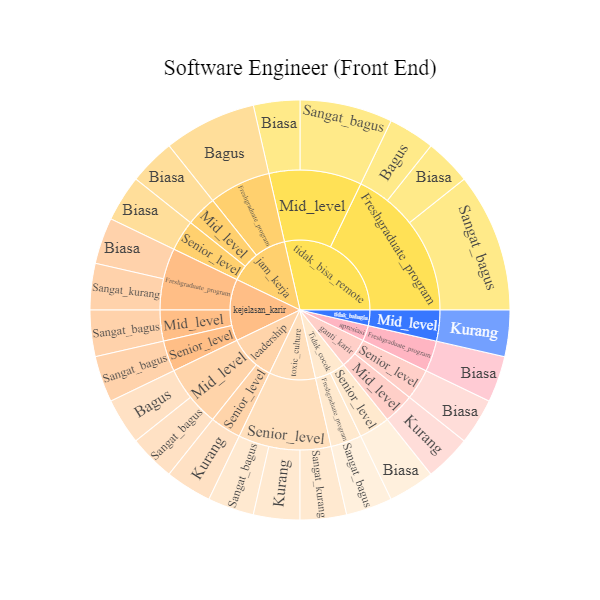

Alasan resign dalam departemen Software Engineer (Front End) sangat bervariasi. Proporsi alasan paling banyak yaitu 8 dari 28 karyawan adalah tidak bisa remote, dengan jenjang karir Fresh Graduate dan Mid Level. Sedangkan alasan resign Senior Level yang paling banyak muncul adalah toxic culture, sebesar 3 karyawan. Performa karyawan yang keluar juga cukup banyak karyawan dengan performa bagus, sehingga menjadi tanda bahwa perusahaan banyak kehilangan talenta terbaik mereka.

In [ ]:
# Product Design (UI & UX)
productdesign_color_map = {'jam_kerja': '#FFE156', 
                      'ganti_karir': '#FFBE86',
                      'tidak_bahagia':'#FFDFBC',
                      'Tidak_cocok':'#FFE9CE',
                      'leadership': '#FFCFC8'}

fig = px.sunburst(productdesign_resign, path=['AlasanResign','JenjangKarir', 'PerformancePegawai'],
				values='Resign', title='Resign Rate Karyawan', color = 'AlasanResign',
        color_discrete_map=productdesign_color_map, width=600, height=600
        )

fig.update_layout(
    title={
        'text': "Faktor Resign Product Design (UI & UX)",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Epilogue",
        size=16,
        color="Black"))
fig.show()


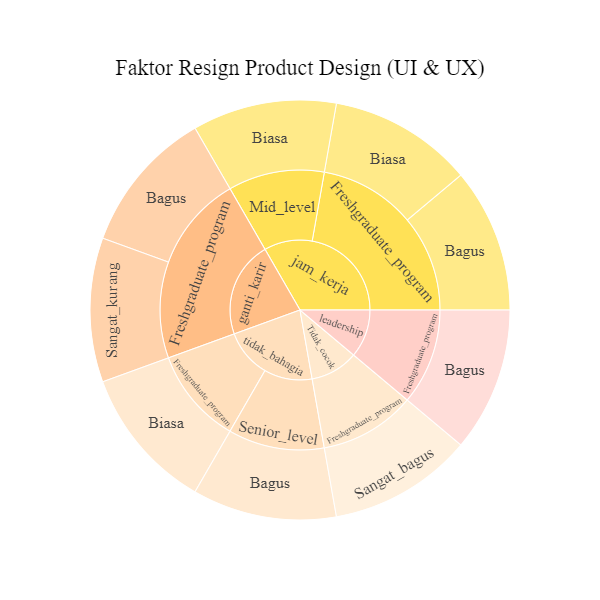

Pekerjaan Product Design (UI & UX) tidak ada karyawan yang keluar karena toxic culture. Jenjang karir yang paling banyak keluar dari perusahaan adalah Fresh Graduate Program. Keluarnya karyawan di bidang pekerjaan ini mayoritas disebabkan oleh alasan yang berhubungan dengan lingkungan kerja (jam kerja, tidak bahagia,leadership) dan kepuasan karir (ganti karir, tidak cocok). 

## Kesimpulan

Dari ketiga jenis pekerjaan yang memiliki tingkat retensi paling rendah, alasan keluar yang paling banyak muncul adalah alasan yang berhubungan dengan lingkungan kerja, yaitu toxic culture dan jam kerja. Dalam pekerjaan Product Design (UI & UX) toxic culture tidak muncul, tetapi alasan lingkungan kerja lainnya. Sehingga kasus keluarnya karyawan karena toxic culture ini cukup eksklusif pada jenis pekerjaan Data Analyst dan Software Engineer (Front End) Senior Level. Perlu dilakukan pendalaman lebih lanjut terkait toxic culture seperti apa yang melatarbelakangi keluarnya karyawan ini, apakah faktor antar karyawan, karyawan dengan level manajerial atau dengan budaya perusahaan secara keseluruhan. Selain itu, dalam kasus Software Engineer (Front End) yang merupakan jenis pekerjaan paling banyak diperusahaan, alasan mayoritas yang melatarbelakangi keluarnya karyawan adalah remote working. Maka dalam merekerut karyawan posisi ini, perlu mempertimbangkan adanya remote working dan memberikan gambaran kepada calon karyawan mengenai remote working di perusahaan tersebut.